### The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

### Objective
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [153]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
import itertools

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score, KFold

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe


#Modules related to pipe line creation for faster processing
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
#from sklearn.features.transformers import DataFrameSelector


#Dumping model into current directory: joblib.dump(model_xg,"my_model.pkl") 
#Loading model: my_model_loaded=joblib.load("my_model.pkl")

#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline

<Figure size 432x216 with 0 Axes>

In [154]:
data = pd.read_csv('train.csv')

In [155]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [157]:
data.shape

(891, 12)

In [158]:
profile = pandas_profiling.ProfileReport(data)

In [159]:
profile.to_file("profile_report.html")

### Warnings from profile report

Ticket has a high cardinality: 681 distinct values	
Cabin has a high cardinality: 147 distinct values	
Age has 177 (19.9%) missing values	
Cabin has 687 (77.1%) missing values	
Ticket is uniformly distributed	
Cabin is uniformly distributed	
PassengerId has unique values	
Name has unique values	
SibSp has 608 (68.2%) zeros	
Parch has 678 (76.1%) zeros	
Fare has 15 (1.7%) zeros	

#### We would drop Ticket, Cabin, Name, PassengerId

In [160]:
titanic_data = data.copy()

In [161]:
## check for duplicate rows
print("Number of duplicate rows :" , len(titanic_data[titanic_data.duplicated(keep=False)]))

Number of duplicate rows : 0


In [162]:
titanic_data.drop(columns=['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1, inplace=True)

In [163]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Exploratory analysis

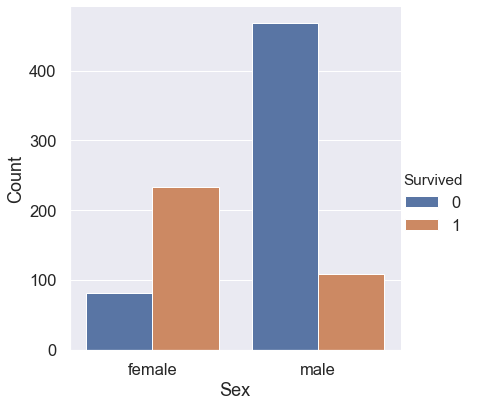

In [164]:
Sex_Survived = titanic_data.groupby(['Sex','Survived']).agg({'Survived':['count']})
Sex_Survived.columns = ["_".join(x) for x in Sex_Survived.columns.ravel()]
Sex_Survived.reset_index(inplace = True)

sns.set(font_scale=1.5)
g = sns.catplot(x='Sex', y='Survived_count', hue='Survived',  data=Sex_Survived, kind='bar', height=6, aspect =1)
g.set_axis_labels("Sex", "Count");

Though the number of male passengers is almost 4 times that of female passengers,<bR>
no. of females who survived is more than double than the number of males who survived.

In [165]:
# creating age categories to see age group versus survival
print('min age:',titanic_data.Age.min())
print('max age:',titanic_data.Age.max())

bins = [0, 2, 10, 20, 35, 50, 65, np.inf]
names = ['<2', '2-10', '10-20', '20-35', '35-50', '50-65', '65+']
titanic_data['AgeRange'] = pd.cut(titanic_data['Age'], bins, labels=names)
titanic_data.head(5)

min age: 0.42
max age: 80.0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeRange
0,0,3,male,22.0,1,0,7.2500,S,20-35
1,1,1,female,38.0,1,0,71.2833,C,35-50
2,1,3,female,26.0,0,0,7.9250,S,20-35
3,1,1,female,35.0,1,0,53.1000,S,20-35
4,0,3,male,35.0,0,0,8.0500,S,20-35


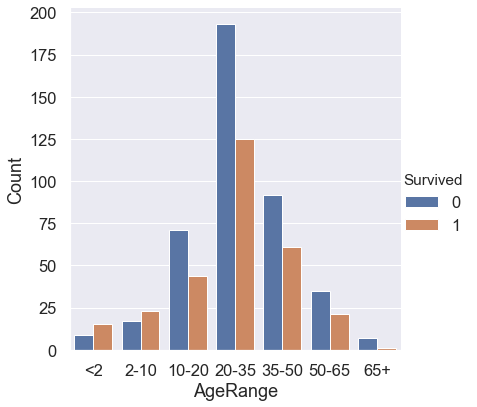

In [166]:
Age_Survived = titanic_data.groupby(['AgeRange','Survived']).agg({'Survived':['count']})
Age_Survived.columns = ["_".join(x) for x in Age_Survived.columns.ravel()]
Age_Survived.reset_index(inplace = True)

sns.set(font_scale=1.5)
g = sns.catplot(x='AgeRange', y='Survived_count', hue='Survived',  data=Age_Survived, kind='bar', height=6, aspect =1)
g.set_axis_labels("AgeRange", "Count");

##### children below 10 years of age have the best chance of survival

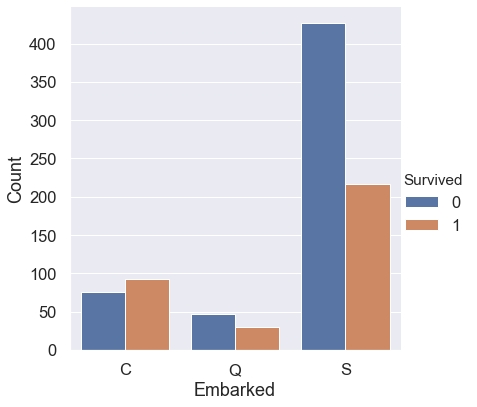

In [167]:
Embarked_Survived = titanic_data.groupby(['Embarked','Survived']).agg({'Survived':['count']})
Embarked_Survived.columns = ["_".join(x) for x in Embarked_Survived.columns.ravel()]
Embarked_Survived.reset_index(inplace = True)

sns.set(font_scale=1.5)
g = sns.catplot(x='Embarked', y='Survived_count', hue='Survived',  data=Embarked_Survived, kind='bar', height=6, aspect =1)
g.set_axis_labels("Embarked", "Count");

#### folks embarking from Cherbourg had a better survival rate compared to Queenstown and Southampton

In [168]:
Embarked_Survived = titanic_data.groupby(['Embarked','Sex','Survived']).agg({'Survived':['count']})
Embarked_Survived.columns = ["_".join(x) for x in Embarked_Survived.columns.ravel()]
Embarked_Survived.reset_index(inplace = True)

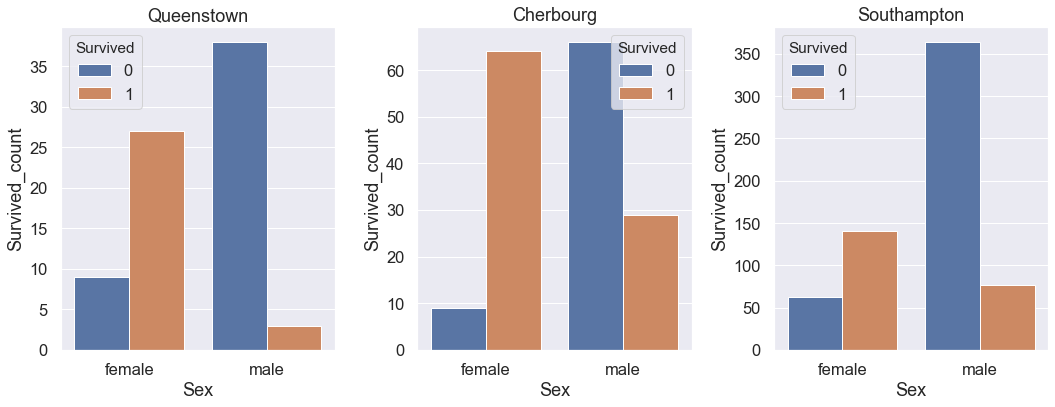

In [169]:
C = Embarked_Survived[Embarked_Survived['Embarked'] == 'C']
Q = Embarked_Survived[Embarked_Survived['Embarked'] == 'Q']
S = Embarked_Survived[Embarked_Survived['Embarked'] == 'S']


fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(131)
ax1.set_title('Queenstown')
g = sns.catplot(x='Sex', y='Survived_count', hue='Survived',  data=Q, kind='bar', height=6, aspect =1, ax=ax1) # pass ax1

ax2 = fig.add_subplot(132)
ax2.set_title('Cherbourg')
g = sns.catplot(x='Sex', y='Survived_count', hue='Survived',  data=C, kind='bar', height=6, aspect =1, ax=ax2) # pass ax2

ax3 = fig.add_subplot(133)
ax3.set_title('Southampton')
g = sns.catplot(x='Sex', y='Survived_count', hue='Survived',  data=S, kind='bar', height=6, aspect =1, ax=ax3) # pass ax3

plt.close(2)
plt.close(3)
plt.close(4)
plt.tight_layout()

#### women embarking from Cherbourg had the best survival rate, men from southampton had the worst survival rate.

In [170]:
Class_Survived = titanic_data.groupby(['Pclass','Sex','Survived']).agg({'Survived':['count']})
Class_Survived.columns = ["_".join(x) for x in Class_Survived.columns.ravel()]
Class_Survived.reset_index(inplace = True)

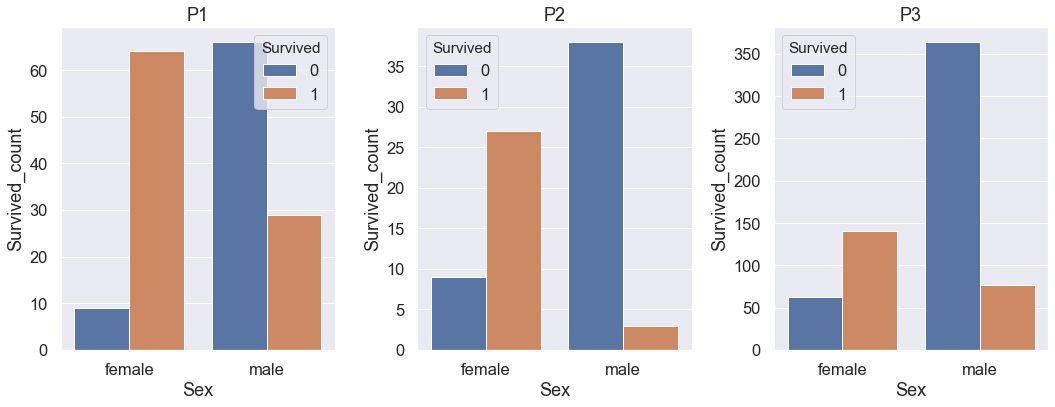

In [171]:
P1 = Embarked_Survived[Class_Survived['Pclass'] == 1]
P2 = Embarked_Survived[Class_Survived['Pclass'] == 2]
P3 = Embarked_Survived[Class_Survived['Pclass'] == 3]


fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(131)
ax1.set_title('P1')
g = sns.catplot(x='Sex', y='Survived_count', hue='Survived',  data=P1, kind='bar', height=6, aspect =1, ax=ax1) # pass ax1

ax2 = fig.add_subplot(132)
ax2.set_title('P2')
g = sns.catplot(x='Sex', y='Survived_count', hue='Survived',  data=P2, kind='bar', height=6, aspect =1, ax=ax2) # pass ax2

ax3 = fig.add_subplot(133)
ax3.set_title('P3')
g = sns.catplot(x='Sex', y='Survived_count', hue='Survived',  data=P3, kind='bar', height=6, aspect =1, ax=ax3) # pass ax3

plt.close(2)
plt.close(3)
plt.close(4)
plt.tight_layout()

In [172]:
Class_Survived = titanic_data.groupby(['Pclass','Survived']).agg({'Survived':['count']})
Class_Survived.columns = ["_".join(x) for x in Class_Survived.columns.ravel()]
Class_Survived.reset_index(inplace = True)

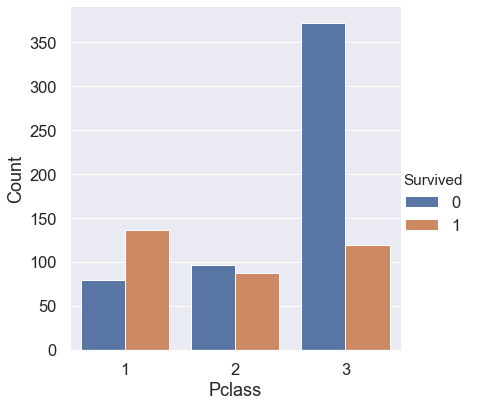

In [173]:
sns.set(font_scale=1.5)
g = sns.catplot(x='Pclass', y='Survived_count', hue='Survived',  data=Class_Survived, kind='bar', height=6, aspect =1)
g.set_axis_labels("Pclass", "Count");

#### first class passengers had the best survival rate. 3rd class the worst.
    over 90% of first class females survived.
    close to 70% of second class and third class females survived.
    Only 3 males from second class survived
    almost 80% of third class male passengers did not survive

In [174]:
## check for missing values
count_missing = titanic_data.isnull().sum()
percent_missing = count_missing * 100 / len(data)
missing_value_df = pd.DataFrame({'count_missing': count_missing, 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending = False)
missing_value_df.head(10)

,count_missing,percent_missing
Age,177,19.865320
AgeRange,177,19.865320
Embarked,2,0.224467
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Fare,0,0.000000


#### we need to impute the missings in age varibale. Though it has almost 20% missings but we have seen from the exploratory analysis above that age is a important factor influencing survival.

In [175]:
titanic_data_T = titanic_data.copy()

In [176]:
titanic_data_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    object  
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    object  
 8   AgeRange  714 non-null    category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 57.0+ KB


In [177]:
#imputing Embarked with mode
titanic_data_T['Embarked']=titanic_data_T['Embarked'].fillna((titanic_data_T['Embarked'].mode()))

In [178]:
#imputing Embarked with mode
titanic_data_T['Age']=titanic_data_T['Age'].fillna((titanic_data_T['Age'].mean()))

In [179]:
cat_data = titanic_data_T[['Sex','Embarked']]
num_data = titanic_data_T[['Age','Fare','Pclass','SibSp','Parch']]
#one hot encoding for categorical varibales
cat_data = pd.get_dummies(cat_data, columns=cat_data.columns, prefix=cat_data.columns, drop_first=True)
cat_data.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [180]:
titanic_data_y = titanic_data_T['Survived']
titanic_data_X = pd.concat([num_data, cat_data], axis=1)
titanic_data_X.head()

,Age,Fare,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,22.0,7.2500,3,1,0,1,0,1
1,38.0,71.2833,1,1,0,0,0,0
2,26.0,7.9250,3,0,0,0,0,1
3,35.0,53.1000,1,1,0,0,0,1
4,35.0,8.0500,3,0,0,1,0,1


#### imputing age with KNN

#### visualizing correlations

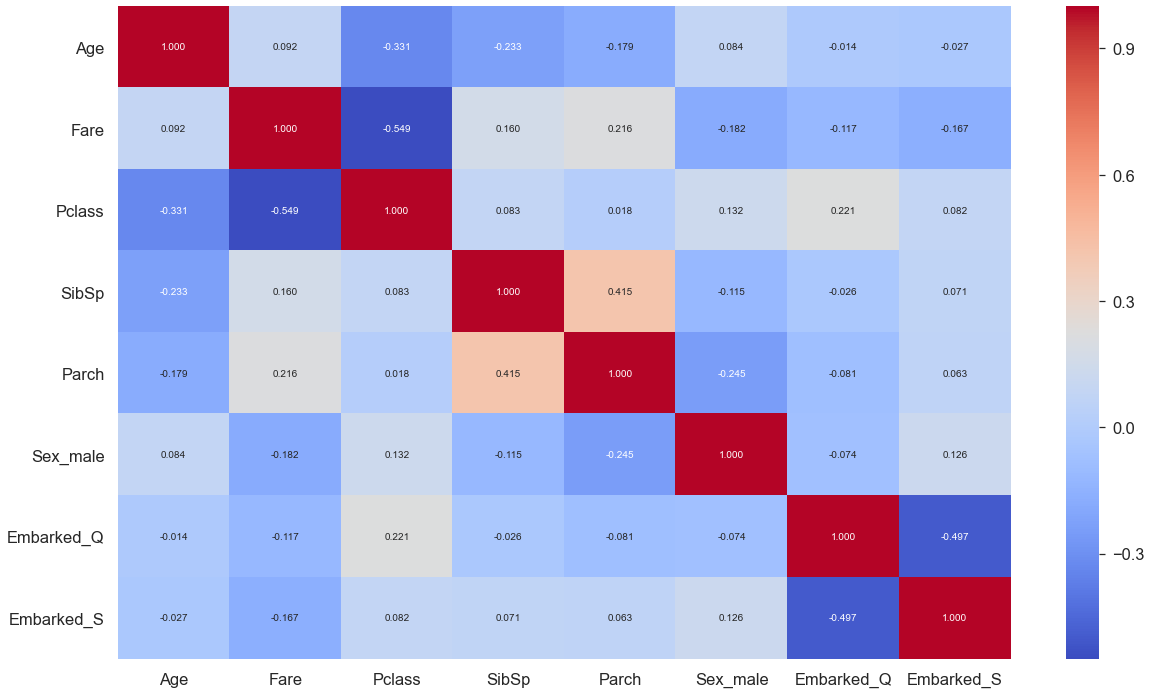

In [181]:
# visualize correlation matrix in Seaborn using a heatmap
#Checking Correlation 
corr = titanic_data_X.corr()
plt.figure(figsize=(20,12))
sns.heatmap(data=corr,annot=True,cmap='coolwarm', fmt=".3f",annot_kws={'size':10})
plt.show()


### Starting feature reduction with RFE, F-regression techniques, VIF

In [182]:
#lm = LinearRegression()
lm = RandomForestRegressor()

# create the RFE model and select 20 attributes
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(titanic_data_X, titanic_data_y)

In [183]:
#below are the most important 20 variables from RFE
imp_vars_RFE = list(titanic_data_X.columns[rfe.support_])
imp_vars_RFE

['Age',
 'Fare',
 'Pclass',
 'SibSp',
 'Parch',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S']

In [184]:
#Using F-Regression
#F-Regression feature Selection based on importance
F_values, p_values  = f_regression( titanic_data_X, titanic_data_y)

itertools.zip_longest(titanic_data_X.columns, F_values, p_values)
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(titanic_data_X.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results.sort_values(by=['F_Value'], ascending=False, inplace=True)

f_reg_results.to_csv('f_reg_cars_results.csv')


In [185]:
feature_rank = f_reg_results.head(10)
imp_vars_Freg = list(feature_rank.Variable.values)
imp_vars_Freg

['Sex_male',
 'Pclass',
 'Fare',
 'Embarked_S',
 'Parch',
 'Age',
 'SibSp',
 'Embarked_Q']

#### important features with XGBoost Regressor

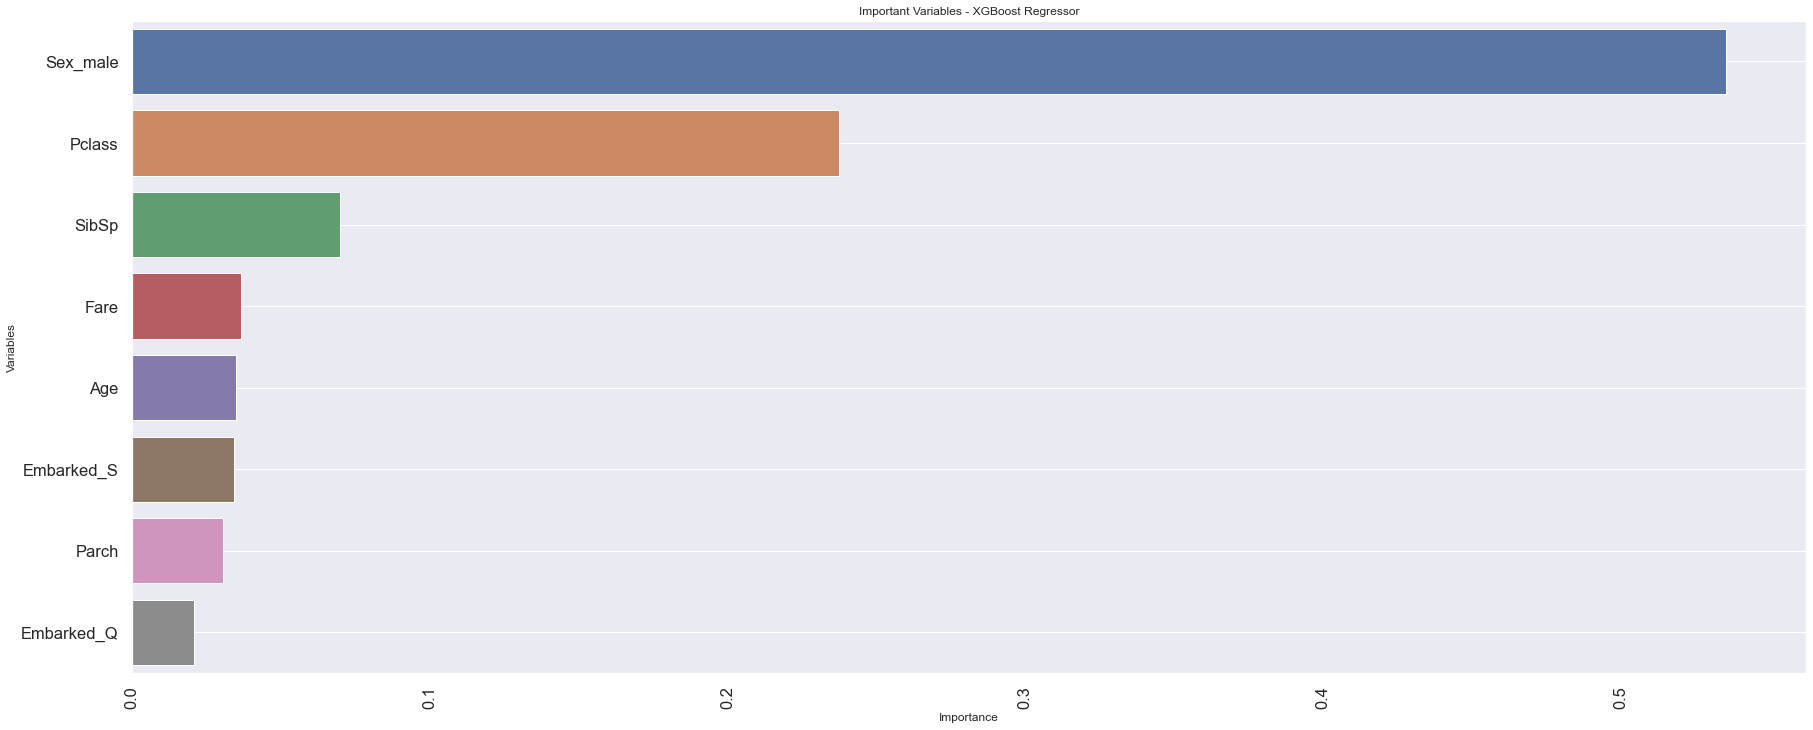

In [186]:
xgb = XGBClassifier()
xgb.fit(titanic_data_X, titanic_data_y)

indices = np.argsort(xgb.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(titanic_data_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         titanic_data_X.columns[indices[f]],
                         xgb.feature_importances_[indices[f]]]
plt.figure(figsize=(30,12))
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )
plt.grid()
plt.title('Important Variables - XGBoost Regressor', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.xlabel('Importance', fontsize=12)
plt.xticks(rotation=90)
plt.show()

#### imputing the Age missings with KNN

In [187]:
feature_rank = feature_rank.head(10)
imp_vars_XGB = list(feature_rank.feature.values)
imp_vars_XGB

['Sex_male',
 'Pclass',
 'SibSp',
 'Fare',
 'Age',
 'Embarked_S',
 'Parch',
 'Embarked_Q']

In [189]:
Final_list = list(set(imp_vars_Freg + imp_vars_RFE + imp_vars_XGB))
Final_list

['SibSp',
 'Embarked_Q',
 'Sex_male',
 'Pclass',
 'Parch',
 'Age',
 'Embarked_S',
 'Fare']

In [238]:
##Variance Inflation factor analysis with the finalized variables from RFE and F-regression. 
##Targetting of VIF less than 5 for all variables

Final_list =[
    'SibSp',
 #'Embarked_Q',
 'Sex_male',
 'Pclass',
 'Parch',
 'Age',
 'Embarked_S',
# 'Fare'
]

In [239]:
X = titanic_data_X[Final_list]

In [240]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.sort_values(by='VIF_Factor', ascending=False)

,VIF_Factor,features
2,4.872081,Pclass
4,3.655091,Age
5,3.497106,Embarked_S
1,3.113096,Sex_male
3,1.529765,Parch
0,1.509266,SibSp


In [241]:
#titanic_data_X.drop(['Fare'], axis = 1, inplace = True) 

### Split into train and test

In [242]:
train_X, test_X, train_y, test_y = train_test_split( X,
                                                  titanic_data_y,
                                                  test_size = 0.3,
                                                  random_state = 123)

In [243]:
#parameter grid for gridsearchCV
param_grid_xgb = {'n_estimators': [400,450,500,550,600],
                  'max_depth': [3,4,5,6],
                 'learning_rate': [0.004, 0.005,0.006, 0.007,0.008],
                  'colsample_bytree':[1], 
                  'subsample':[1],
                  'gamma':[0]
                 }

xgb_estimator_knn = GridSearchCV(estimator=XGBClassifier(), 
                        param_grid=param_grid_xgb, 
                        cv=5, 
                        verbose=True, n_jobs=-1)

In [244]:
xgb_estimator_knn.fit(train_X,train_y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   58.4s finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [245]:
xgb_estimator_knn.best_params_

{'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.005,
 'max_depth': 4,
 'n_estimators': 550,
 'subsample': 1}

In [246]:
xgb_best_estimate = xgb_estimator_knn.best_estimator_
xgb_best_estimate

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.005, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=550, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [247]:
predict_train = xgb_best_estimate.predict(train_X)
predict_test = xgb_best_estimate.predict(test_X)

In [248]:
# predict probabilities on train and test
predict_prob_train = xgb_best_estimate.predict_proba(train_X)[:,1]
predict_prob_test = xgb_best_estimate.predict_proba(test_X)[:,1]

In [249]:
print('ROC_AUC score on train: ',metrics.roc_auc_score(train_y,predict_prob_train))
print('ROC_AUC score on test: ',metrics.roc_auc_score(test_y,predict_prob_test))

ROC_AUC score on train:  0.8985899044076301
ROC_AUC score on test:  0.8739195678271309


In [250]:
print('Accuracy on train: ',metrics.accuracy_score(train_y,predict_train))
print('Accuracy on test: ',metrics.accuracy_score(test_y,predict_test))

Accuracy on train:  0.8459069020866774
Accuracy on test:  0.8395522388059702


In [251]:
print(metrics.classification_report(train_y,predict_train))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       379
           1       0.89      0.70      0.78       244

    accuracy                           0.85       623
   macro avg       0.86      0.82      0.83       623
weighted avg       0.85      0.85      0.84       623



In [252]:
print(metrics.classification_report(test_y,predict_test))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       170
           1       0.86      0.67      0.75        98

    accuracy                           0.84       268
   macro avg       0.84      0.80      0.82       268
weighted avg       0.84      0.84      0.83       268



#### Random forest

In [253]:

param_grid_rf = {'n_estimators': [60,70,80,90,100,110],
                  'max_depth': [3,4,5,6,7,8,9],
                  'max_features': [4,5,6,7]
                }

gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=param_grid_rf,  
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_rf.fit(train_X, train_y)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 840 out of 840 | elapsed:   47.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': [4, 5, 6, 7],
                         'n_estimators': [60, 70, 80, 90, 100, 110]},
             verbose=True)

In [254]:
gscv_rf.best_params_

{'max_depth': 4, 'max_features': 5, 'n_estimators': 90}

In [255]:
rf_best_estimate = gscv_rf.best_estimator_
rf_best_estimate

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=90)

In [256]:
predict_train = rf_best_estimate.predict(train_X)
predict_test = rf_best_estimate.predict(test_X)

In [257]:
# predict probabilities on train and test
predict_prob_train = rf_best_estimate.predict_proba(train_X)[:,1]
predict_prob_test = rf_best_estimate.predict_proba(test_X)[:,1]

In [258]:
print('ROC_AUC score on train: ',metrics.roc_auc_score(train_y,predict_prob_train))
print('ROC_AUC score on test: ',metrics.roc_auc_score(test_y,predict_prob_test))

ROC_AUC score on train:  0.8990278558761192
ROC_AUC score on test:  0.8644957983193278


In [259]:
print('Accuracy on train: ',metrics.accuracy_score(train_y,predict_train))
print('Accuracy on test: ',metrics.accuracy_score(test_y,predict_test))

Accuracy on train:  0.8443017656500803
Accuracy on test:  0.8395522388059702


In [260]:
print(metrics.classification_report(train_y,predict_train))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       379
           1       0.86      0.73      0.78       244

    accuracy                           0.84       623
   macro avg       0.85      0.82      0.83       623
weighted avg       0.85      0.84      0.84       623



In [261]:
print(metrics.classification_report(test_y,predict_test))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       170
           1       0.85      0.68      0.76        98

    accuracy                           0.84       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.84      0.84      0.84       268



## Support Vector Machines (SVR)

In [ ]:
param_grid = {'C': [5,5.1,5.2,5.4,5.6,5.8,5.9,6],  
              'gamma': [0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06], 
              'kernel': ['poly'],
             'class_weight':['balanced'],
             'degree':[2,3,4,5]}  

gscv_svr = GridSearchCV(estimator=SVC(), 
                        param_grid=param_grid, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_svr.fit(train_X, train_y)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.7s


In [314]:
gscv_svr.best_params_

{'C': 5, 'class_weight': 'balanced', 'gamma': 0.03, 'kernel': 'rbf'}

In [315]:
svr_best_estimate = gscv_svr.best_estimator_
svr_best_estimate

SVC(C=5, class_weight='balanced', gamma=0.03)

In [316]:
predict_train = svr_best_estimate.predict(train_X)
predict_test = svr_best_estimate.predict(test_X)

In [317]:
print('Accuracy on train: ',metrics.accuracy_score(train_y,predict_train))
print('Accuracy on test: ',metrics.accuracy_score(test_y,predict_test))

Accuracy on train:  0.8298555377207063
Accuracy on test:  0.832089552238806


In [318]:
print(metrics.classification_report(train_y,predict_train))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       379
           1       0.79      0.78      0.78       244

    accuracy                           0.83       623
   macro avg       0.82      0.82      0.82       623
weighted avg       0.83      0.83      0.83       623



In [319]:
print(metrics.classification_report(test_y,predict_test))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       170
           1       0.77      0.77      0.77        98

    accuracy                           0.83       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



### predicting on test data

#### read test file and do all data prerprocessing steps on it

In [262]:
test_data = pd.read_csv('test.csv')

In [263]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [264]:
## check for missing values
count_missing = test_data.isnull().sum()
percent_missing = count_missing * 100 / len(data)
missing_value_df = pd.DataFrame({'count_missing': count_missing, 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending = False)
missing_value_df.head(5)

,count_missing,percent_missing
Cabin,327,36.700337
Age,86,9.652076
Fare,1,0.112233
PassengerId,0,0.000000
Pclass,0,0.000000


In [265]:
#getting Passengid for later use in submission tile creation
PassengerId = test_data['PassengerId']

#### dropping PassengerId, Name, Cabin, Ticket



In [266]:
test_data.drop(columns=['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1, inplace=True)

In [267]:
#impute 1 missing value in Fare by mean
test_data['Fare']=test_data['Fare'].fillna((test_data['Fare'].mean()))
test_data['Age']=test_data['Age'].fillna((test_data['Age'].mean()))

In [268]:
cat_dat = test_data[['Sex','Embarked']]
num_dat = test_data[['Age','Fare','Pclass','SibSp','Parch']]

#one hot encoding for categorical varibales
cat_dat = pd.get_dummies(cat_dat, columns=cat_dat.columns, prefix=cat_dat.columns, drop_first=True)
cat_dat.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,1,0
1,0,0,1
2,1,1,0
3,1,0,1
4,0,0,1


In [269]:
data_X = pd.concat([num_dat, cat_dat], axis=1)
data_X = data_X[Final_list]

In [310]:
predict_y = svr_best_estimate.predict(data_X)
#convert to series
predict_y = pd.Series(predict_y)

In [311]:
predict_df = pd.DataFrame()
predict_df = pd.concat([PassengerId, predict_y], axis=1)
predict_df.rename(columns={0: 'Survived'}, inplace=True)
predict_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [312]:
predict_df.to_csv('submission.csv', index=False)

### final submission was with random forest model